In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_score

In [64]:
df = pd.read_csv(r'E:\Trim V PPTs\MA\Mall_Customers.csv')

In [65]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [66]:
df=pd.get_dummies(df)
df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [67]:
df=df.drop(columns=['CustomerID','Age','Gender_Female'])
df

,Annual Income (k$),Spending Score (1-100),Gender_Male
0,15,39,1
1,15,81,1
2,16,6,0
3,16,77,0
4,17,40,0
...,...,...,...
195,120,79,0
196,126,28,0
197,126,74,1
198,137,18,1


In [68]:
df['Annual Income'] = df['Annual Income (k$)']*1000

In [69]:
df

,Annual Income (k$),Spending Score (1-100),Gender_Male,Annual Income
0,15,39,1,15000
1,15,81,1,15000
2,16,6,0,16000
3,16,77,0,16000
4,17,40,0,17000
...,...,...,...,...
195,120,79,0,120000
196,126,28,0,126000
197,126,74,1,126000
198,137,18,1,137000


In [70]:
df=df.drop(columns=['Annual Income (k$)'])
df

,Spending Score (1-100),Gender_Male,Annual Income
0,39,1,15000
1,81,1,15000
2,6,0,16000
3,77,0,16000
4,40,0,17000
...,...,...,...
195,79,0,120000
196,28,0,126000
197,74,1,126000
198,18,1,137000


In [71]:
scalar = StandardScaler()
scaled=scalar.fit_transform(df)

In [72]:
scaled

array([[-0.43480148,  1.12815215, -1.73899919],
       [ 1.19570407,  1.12815215, -1.73899919],
       [-1.71591298, -0.88640526, -1.70082976],
       [ 1.04041783, -0.88640526, -1.70082976],
       [-0.39597992, -0.88640526, -1.66266033],
       [ 1.00159627, -0.88640526, -1.66266033],
       [-1.71591298, -0.88640526, -1.62449091],
       [ 1.70038436, -0.88640526, -1.62449091],
       [-1.83237767,  1.12815215, -1.58632148],
       [ 0.84631002, -0.88640526, -1.58632148],
       [-1.4053405 ,  1.12815215, -1.58632148],
       [ 1.89449216, -0.88640526, -1.58632148],
       [-1.36651894, -0.88640526, -1.54815205],
       [ 1.04041783, -0.88640526, -1.54815205],
       [-1.44416206,  1.12815215, -1.54815205],
       [ 1.11806095,  1.12815215, -1.54815205],
       [-0.59008772, -0.88640526, -1.50998262],
       [ 0.61338066,  1.12815215, -1.50998262],
       [-0.82301709,  1.12815215, -1.43364376],
       [ 1.8556706 , -0.88640526, -1.43364376],
       [-0.59008772,  1.12815215, -1.395

In [89]:
kmeans = KMeans(init="random", n_clusters=,7 n_init=20, max_iter=300, random_state=42)

In [90]:
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=7,
       n_init=20, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [91]:
# The lowest SSE value
kmeans.inertia_

125.58535025038731

In [92]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[-1.40339942,  1.12815215,  0.93858626],
       [-0.00776431,  1.12815215, -0.6282688 ],
       [-0.27822119, -0.88640526, -0.47177414],
       [-1.02790866, -0.88640526,  1.08765909],
       [ 1.26040667,  1.12815215,  1.01344075],
       [ 1.22158511, -0.88640526,  0.97284787],
       [ 1.17778643, -0.88640526, -1.33087991]])

In [93]:
# The number of iterations required to converge
kmeans.n_iter_

13

In [94]:
kmeans.labels_

array([1, 1, 2, 6, 2, 6, 2, 6, 1, 6, 1, 6, 2, 6, 1, 1, 2, 1, 1, 6, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 6, 1, 6, 1, 1, 2, 6, 2, 6, 2, 6, 2, 1, 1, 2,
       2, 6, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 4, 3, 5, 0, 4, 0, 4, 0, 4,
       3, 5, 0, 5, 3, 4, 0, 5, 3, 4, 3, 5, 0, 4, 0, 5, 3, 4, 0, 4, 3, 5,
       3, 5, 0, 5, 0, 5, 3, 5, 0, 5, 0, 5, 0, 5, 3, 4, 0, 4, 0, 4, 3, 5,
       0, 4, 0, 4, 3, 5, 0, 5, 3, 4, 3, 4, 3, 5, 3, 5, 0, 5, 3, 5, 3, 4,
       0, 4])

In [96]:
kmeans_kwargs = {"init": "random","n_init": 20,"max_iter": 300,"random_state": 42,}

In [99]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

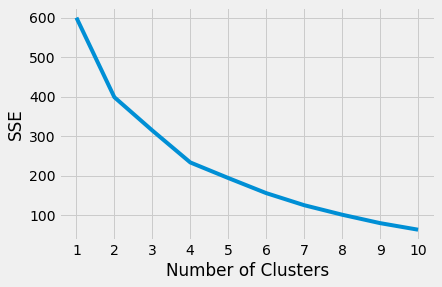

In [100]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [101]:
kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")

In [102]:
kl.elbow

4

In [103]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    score = silhouette_score(scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

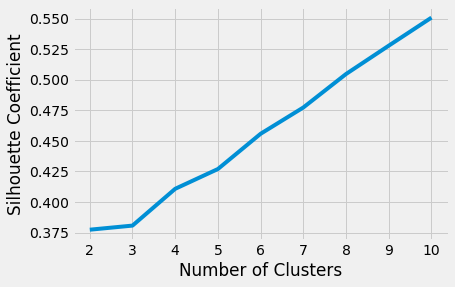

In [104]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()